# Effects of House Characteristics on Their Sale Prices
## by Otto Roberson

## Investigation Overview

In this investigation, I wanted to look at the characteristics of houses that could be used to predict their prices. The main focus was on living area, overall quality, year built, neighborhood, and zoning.

## Dataset Overview

The data consisted of prices and attributes of approximately 1400 houses. The attributes included 80 factors including those mentioned above. Five outliers where removed as per the recommendation in the data dictionary. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')


In [3]:
# load in the dataset into a pandas dataframe
train = pd.read_csv("train.csv")

### Data pre-processing


In [4]:
def get_feature_groups():
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_features = train.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Id','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_features = train.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

In [5]:
train['MSSubClass'] = train.MSSubClass.apply(lambda x: str(x))
train['MoSold'] = train.MoSold.apply(lambda x: str(x))
train['YrSold'] = train.YrSold.apply(lambda x: str(x))

# Update the numerical and categorical features
num_features, cat_features = get_feature_groups()

In [6]:
# Transform categorical features used for rankings
# Also replace missing values with 0

# Alley
train.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
train.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
train.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
train.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope
train.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
train.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
train.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
train.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
train.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
train.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
train.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
train.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
train.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
train.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
train.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
train.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
train.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
train.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
train.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
train.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
train.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Set all missing values in the converted features to 0
converted_features = ['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']
train[converted_features] = train[converted_features].fillna(0)

# Update numerical and categorical features
num_features, cat_features = get_feature_groups()

# Fill NA with missing
train[cat_features] = train[cat_features].fillna('Missing')

# Drop incomplete data for 2010 
train.drop(train[(train.YearBuilt > 2009)].index, inplace=True)

# Handle outliers mentioned in the data dictionary
train.drop(train[train.GrLivArea > 4000].index, inplace=True)

# Drop other outliers in SalePrice
train.drop(train[train.SalePrice < 38000].index, inplace=True)

# Drop other outliers in Living Area
train.drop(train[train.GrLivArea < 550].index, inplace=True)

# Set missing Electrical value to most common value
train.loc[train.Electrical == 'Missing', 'Electrical'] = train.Electrical.mode()[0]

# Set missing veneer to none
train.MasVnrType.replace({'Missing':'None'}, inplace=True)

# Set missing lot frontage to median value
train.LotFrontage = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Set missing garage to 0 
train.GarageYrBlt.fillna(0, inplace=True)

In [7]:
# Find most important categorical features with relation to SalePrice
category_data = train.select_dtypes(exclude=[np.number])

cat = [f for f in train.columns if train.dtypes[f] == 'object']

def anova(frame):
    anv = pd.DataFrame()
    anv['Features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = st.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

## Distribution of House Prices

House prices in the dataset take on a very large range of values, from about \\$35,000 at the lowest, to about \\$625,000 at the highest (after removing outliers). Plotted on a logarithmic scale, house prices exhibit close to a normal distribution and the mean and median are relatively close together.

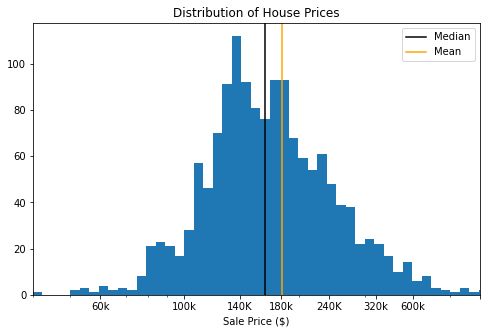

In [8]:
sale_log = np.log1p(train['SalePrice'])

log_binsize = 0.025
bins = 10 ** np.arange(3.5, sale_log.max()+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = train, x = 'SalePrice', bins = bins)
plt.title('Distribution of House Prices')
plt.xscale('log')
plt.xlim([4e4, 6e5])
plt.xticks([6e4, 1e5, 1.4e5, 1.8e5, 2.4e5, 3.2e5, 4e5, 6e5], ['60k', '100k', '140K', '180k', '240K', '320k', '600k'])
plt.xlabel('Sale Price ($)')
plt.axvline(train['SalePrice'].median(), color = 'Black', label = 'Median')
plt.axvline(train['SalePrice'].mean(), color = 'Orange', label = 'Mean')
plt.legend()
plt.show()

## Distribution of Above Ground Living Area 
Above Ground Living Area is a measure of a house's liveable area above ground, and is given in square feet in the dataset. Median house size in the US has risen steadily, according to [goverment census data](https://www.census.gov/const/C25Ann/sftotalmedavgsqft.pdf). Similar to sale price, mean and median values are also relatively close together here at approximately 1500 square feet of living area. For the houses in the dataset this is close to normal distribution after applying a log transform.  

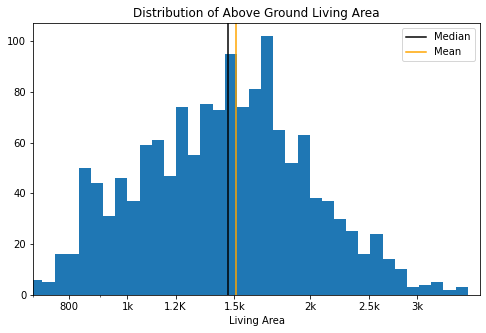

In [9]:
living_log = np.log1p(train['GrLivArea'])

log_binsize = 0.02
bins = 10 ** np.arange(2, living_log.max()+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = train, x = 'GrLivArea', bins = bins)
plt.title('Distribution of Above Ground Living Area')

plt.xscale('log')
plt.xlim([700, 3.8e3])
plt.xticks([800, 1000, 1.2e3, 1.5e3, 2e3, 2.5e3, 3e3], ['800', '1k', '1.2K', '1.5k', '2k', '2.5k', '3k'])
plt.xlabel('Living Area')
plt.axvline(train['GrLivArea'].median(), color = 'Black', label = 'Median')
plt.axvline(train['GrLivArea'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

plt.show()

## Sales Price vs. Living Area

Plotting sales price versus living area on a logarithmic scale produces an approximately linear relationship for the houses in the dataset. It's not surprising to see higher density through the median-mean values for both variables, since both independently showed median and mean values which were relatively close.

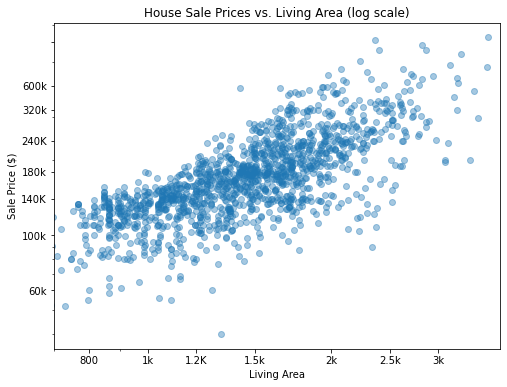

In [10]:
plt.figure(figsize = [8, 6])
plt.scatter(data = train, x = 'GrLivArea', y = 'SalePrice', alpha = 4/10)

plt.title('House Sale Prices vs. Living Area (log scale)')
plt.xscale('log')
plt.xticks([800, 1000, 1.2e3, 1.5e3, 2e3, 2.5e3, 3e3], ['800', '1k', '1.2K', '1.5k', '2k', '2.5k', '3k'])
plt.xlim([700, 3.8e3])
plt.xlabel('Living Area')

plt.yscale('log')
plt.yticks([6e4, 1e5, 1.4e5, 1.8e5, 2.4e5, 3.2e5, 4e5, 6e5], ['60k', '100k', '140K', '180k', '240K', '320k', '600k'])
plt.ylabel('Sale Price ($)')

plt.show()

## Distribution of Overall Quality 
Overall Quality as the name suggests reflects the overall quality of a given house. Here the scale is from 1 to 10, with 1 being poor and 10 excellent. The ratings show a left-skewed distribution. Since this is a subjective rating I have left the data as-is.

As I will show further ahead the data indicates that newer houses tend to have higher ratings.

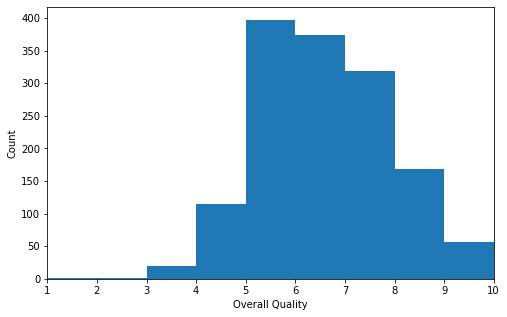

In [11]:
binsize = 1 
bins = np.arange(0, train['OverallQual'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = train, x = 'OverallQual', bins = bins)
plt.xlim([1,10])
plt.xlabel('Overall Quality')
plt.ylabel('Count')
plt.show()

## Sales Price vs. Overall Quality

Plotting sales price on a logarithmic scale versus overall quality shows that houses with higher quality ratings have higher sale prices. Here I've shown the mean sales price as a horizontal red line, and the mean overall quality as a vertical orange line. From this relationship we would expect a house in the mean price range of $180K would have the corresponding overall quality of 7 or above. 

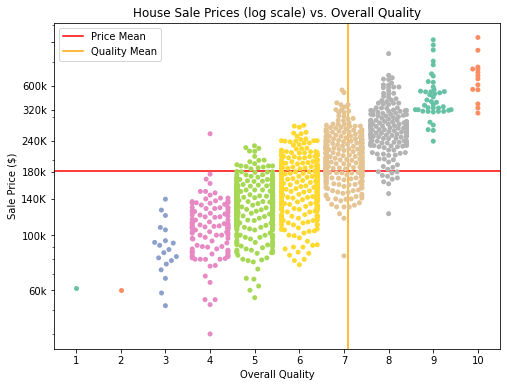

In [12]:
plt.figure(figsize = [8, 6])
sns.swarmplot('OverallQual','SalePrice', data = train , palette = 'Set2')

plt.title('House Sale Prices (log scale) vs. Overall Quality')
plt.xlabel('Overall Quality')
plt.yscale('log')
plt.yticks([6e4, 1e5, 1.4e5, 1.8e5, 2.4e5, 3.2e5, 4e5, 6e5], ['60k', '100k', '140K', '180k', '240K', '320k', '600k'])
plt.ylabel('Sale Price ($)')
plt.axhline(train['SalePrice'].mean(), color = 'Red', label = 'Price Mean')
plt.axvline(train['OverallQual'].mean(), color = 'Orange', label = 'Quality Mean')
plt.legend()
plt.show()

## Living Area vs. Overall Quality

Plotting living area on a logarithmic scale versus overall quality shows that larger living areas and higher quality ratings tend to go together. Here I've plotted the mean living area as a blue line, and the quality mean as an orange line. For a 1500 sq. ft. house we'd expect quality ratings of 7, with a few 5's and 6's mixed in - a reminder that quality is subjective. This makes sense with relation to the sales price trends we've seen. 

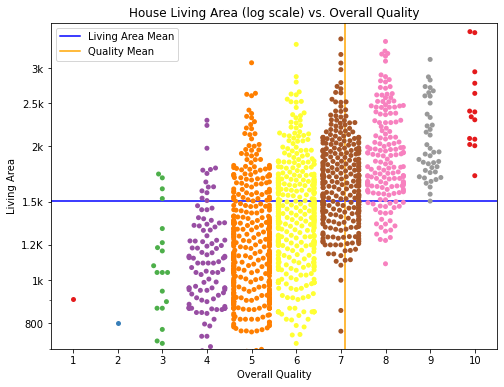

In [13]:
plt.figure(figsize = [8, 6])
sns.swarmplot(x='OverallQual', y='GrLivArea',data=train, palette='Set1')

plt.title('House Living Area (log scale) vs. Overall Quality')
plt.xlabel('Overall Quality')
plt.yscale('log')
plt.yticks([800, 1000, 1.2e3, 1.5e3, 2e3, 2.5e3, 3e3], ['800', '1k', '1.2K', '1.5k', '2k', '2.5k', '3k'])
plt.ylim([700, 3.8e3])
plt.ylabel('Living Area')
plt.axhline(train['GrLivArea'].mean(), color = 'Blue', label = 'Living Area Mean')
plt.axvline(train['OverallQual'].mean(), color = 'Orange', label = 'Quality Mean')
plt.legend()
plt.show()

## Distribution of Year Built
This variable represents the year that house was built, and gives some representation of the house age relative to the data set. The earliest or oldest house is from 1872, and the newest data is from 2009. The majority of houses were built post-WWII with the mean being 1972, and development shows dips and rises relative to the real-estate market, however the overall trend is steady growth. 

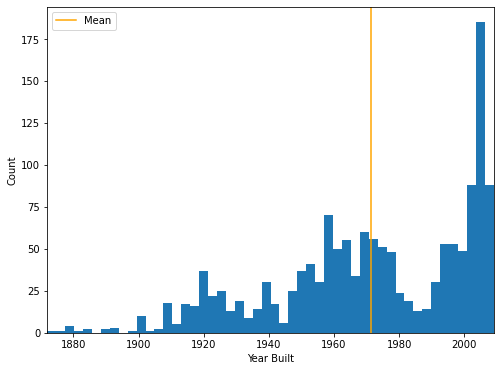

In [14]:
binsize = 20
bins = 50

plt.figure(figsize=[8, 6])
plt.hist(data = train, x = 'YearBuilt', bins = bins)
plt.xlim([1872,2009])
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.axvline(train['YearBuilt'].mean(), color = 'Orange', label = 'Mean')
plt.legend()
plt.show()

## Sales Price vs. Year Built
Plotting sales price on a logarithmic scale versus year built shows that generally newer houses have higher sale prices, with the caveat that there are fewer datapoints for older houses and some missing data (i.e. in the dataset for some year built there are no houses). So we can safely say for a newer house with higher overall quality and larger living area, we expect to have an increase in sales price. The amount of increase depends on all 3 factors.

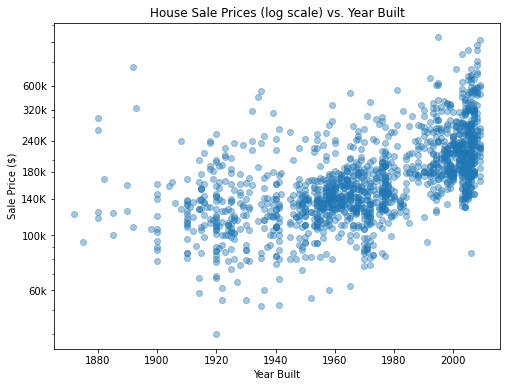

In [15]:
plt.figure(figsize = [8, 6])
plt.scatter(data = train, x = 'YearBuilt', y = 'SalePrice', alpha = 4/10)

plt.title('House Sale Prices (log scale) vs. Year Built')
plt.xlabel('Year Built')
plt.xticks([1880, 1900, 1920, 1940, 1960, 1980, 2000], ['1880', '1900', '1920', '1940', '1960', '1980', '2000'])
plt.yscale('log')
plt.yticks([6e4, 1e5, 1.4e5, 1.8e5, 2.4e5, 3.2e5, 4e5, 6e5], ['60k', '100k', '140K', '180k', '240K', '320k', '600k'])
plt.ylabel('Sale Price ($)')
plt.show()

## Location, Location, Location: Neighborhood

The dataset's Neighborhood feature represents the location of the house within the Ames area. I ran a one-way ANOVA test on the categorical features in the dataset to find out what was most important with relation to sale price. The resulting graph below shows that the neighborhood is orders of magnitude more determinate in predicting sale price than any of the other categorical data points.

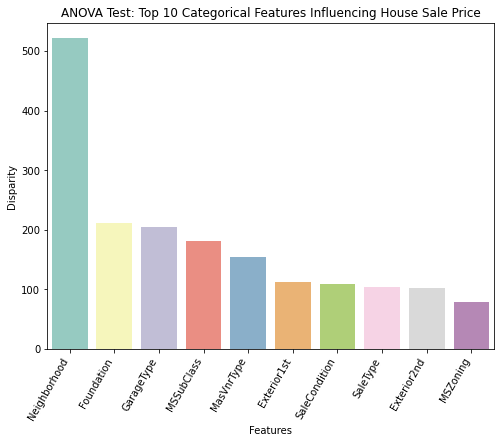

In [16]:
category_data['SalePrice'] = train.SalePrice.values
k = anova(category_data) 
k['Disparity'] = np.log(1./k['pval'].values)

plt.figure(figsize=(8,6))
sns.barplot(data=k, x = 'Features', y='Disparity', palette='Set3') 
plt.title('ANOVA Test: Top 10 Categorical Features Influencing House Sale Price')
# Quick hack for space between graph border and bars and include only top 10
plt.xlim([-0.5, 9.5])

plt.xticks(
    rotation=60, 
    horizontalalignment='right',
    fontweight='light' 
)
plt.show()

## Number of Houses Sold by Neighborhood
When looking at the neighborhoods, we'll first look at the count for the houses in each neighborhood for the dataset. The neighborhoods with the most houses represented are North Ames and College Creek. 

We might be tempted to believe that the areas with the highest house sale prices will have a higher representation however this is not necessarily the case. 

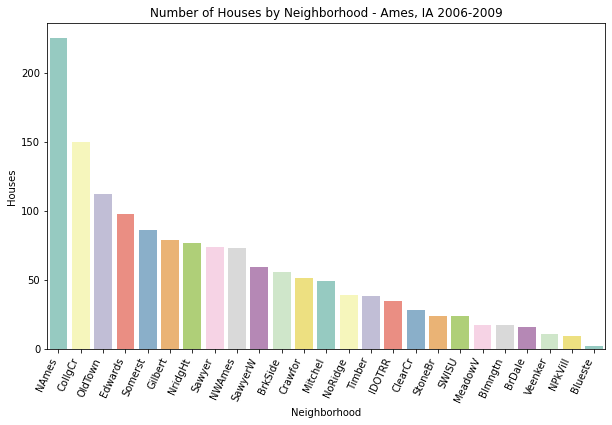

In [17]:
# plotting number of houses sold by neighborhood

plt.figure(figsize=(10,6))
plt.title('Number of Houses by Neighborhood - Ames, IA 2006-2009')

# Applying custom categorical order

sns.countplot(x = 'Neighborhood',
              data = train,
              palette = 'Set3',
              order = train['Neighborhood'].value_counts().index)
plt.ylabel('Houses')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()


## Sale Price by Neighborhood

Here we can observe that North Ridge, North Ridge Heights, and Stone Brooke have some of the most expensive houses in the Ames market. College Creek has homes closer to the mean house sale price, while North Ames is slightly under the mean. We'll take a look next at when the houses where built by neighborhood, which will help to understand the effect between location, house age, and sale price. 

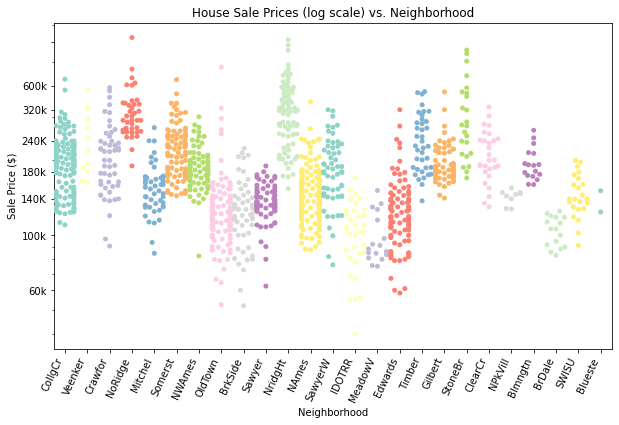

In [18]:
plt.figure(figsize = [10, 6])
sns.swarmplot(x='Neighborhood', y='SalePrice',data=train, palette='Set3')

plt.title('House Sale Prices (log scale) vs. Neighborhood')
plt.xlabel('Neighborhood')
plt.xticks(rotation=65, horizontalalignment='right')
plt.yscale('log')
plt.yticks([6e4, 1e5, 1.4e5, 1.8e5, 2.4e5, 3.2e5, 4e5, 6e5], ['60k', '100k', '140K', '180k', '240K', '320k', '600k'])
plt.ylabel('Sale Price ($)')
plt.show()

## Year Built by Neighborhood

The suburban development in Ames over time shows which neighborhoods are generally more recent, and so have newer houses. North Ames which had the greatest number of sales shows post-WWII development, with a spurt from 1958 to 1960, and tailing off rapidly in the early 1970's. College Creek has had the majority of its development from 1994 onward with a bubble from 2001 to 2005. From our earlier analysis we saw that newer houses tend to have higher prices which explains the difference in prices between North Ames and College Creek, we would expect to also find better overall quality in the College Creek houses.

Two of our neighborhoods with high sales prices are worth noting here. North Ridge saw development from 1990 to 2001. Stone Brooke had development from 2006 onwards. A quick search on the real-estate site [Zillow](https://www.zillow.com/homes/for_sale/Stone-Brooke,-Ames,-IA_rb/) shows that this small neighborhood is located near a lake, which may be a more exclusive area.

In [19]:
# Limit the data to houses newer than 1950
Year = train.drop(train[(train.YearBuilt < 1950)].index)

x = train['GrLivArea']
by_neighbor = (Year
            .groupby('Neighborhood')
            .filter(lambda x : len(x) > 10)
            .groupby(['Neighborhood', 'YearBuilt'])
            .size()
            .unstack()
           )

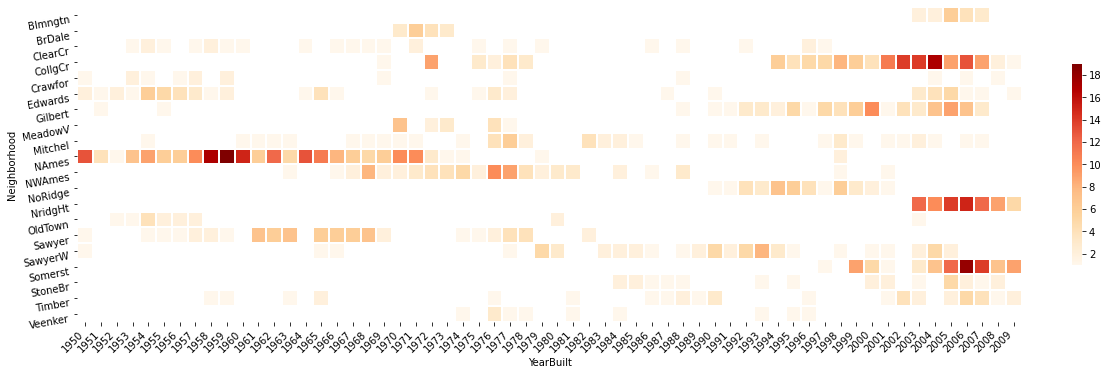

In [22]:
plt.figure(figsize=(18,30))

g = sns.heatmap(
    by_neighbor, 
    square=True, # make cells square
    
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)
plt.yticks(rotation=10, verticalalignment='top')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

## Zoning

The building zones in Ames for the dataset represent what type of housing is permitted within each neighborhood, and will help us to visualize what they might look like.
The large majority of houses are Residential Low Density **RL**. There are also Residential Medium Density **RM**, Floating Village Residential **FV**, Residential High Density **RH**, and Commercial **C (all)**.

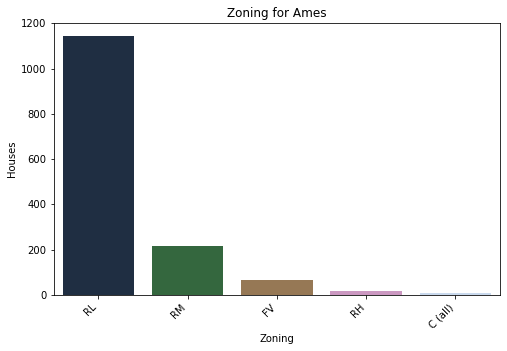

In [23]:
# plotting number of zones

plt.figure(figsize=(8,5))
plt.title('Zoning for Ames')

sns.countplot(x ='MSZoning',
              data=train,
              palette='cubehelix',
              order=train['MSZoning'].value_counts().index)
plt.ylabel('Houses')
plt.xlabel('Zoning')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()


## Sales Price by Neighborhood and Zoning

To reinforce our understanding of Ames neighborhoods it's helpful to observe the building zone(s) applicable to each. There is not such a strong correlation between the zoning and sales price, as noted before the neighborhood was factors of magnitude more critical with respect to predicting the house price. 

The prevalent zoning in Ames is Residential Low Density, we can also see areas where Residential Medium Density is more common. The Somerset neighborhood is listed as Floating Village Residential, a brief search on  [Zillow](https://www.zillow.com/somerset-village-ames-ia/) reveals that this was designed as a retirement community. 

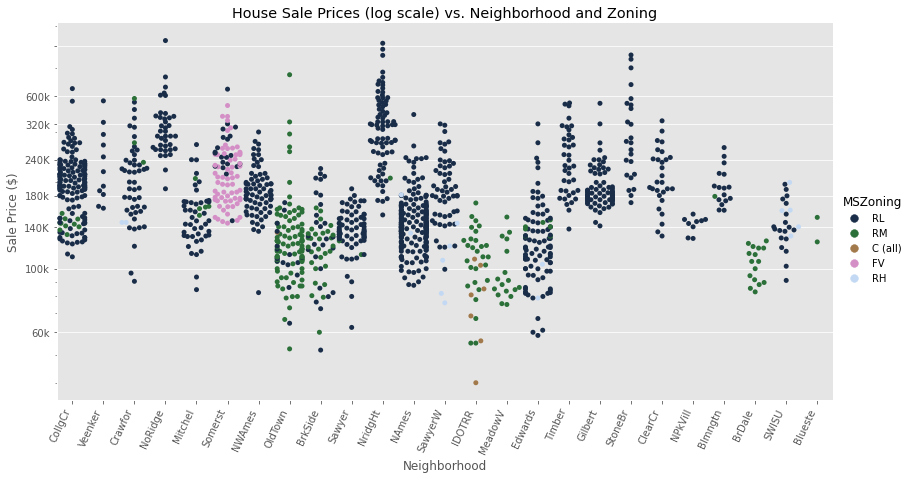

In [24]:
plt.style.use('ggplot')
g = sns.catplot(
    x = 'Neighborhood',
    y = 'SalePrice',
    data = train,
    kind='swarm',
    hue='MSZoning',
    palette = 'cubehelix', 
    height=6, 
    aspect=2
)

plt.title('House Sale Prices (log scale) vs. Neighborhood and Zoning')
plt.xticks(rotation=65, horizontalalignment='right')
plt.xlabel('Neighborhood')
plt.yscale('log')
plt.yticks([6e4, 1e5, 1.4e5, 1.8e5, 2.4e5, 3.2e5, 4e5, 6e5], ['60k', '100k', '140K', '180k', '240K', '320k', '600k'])
plt.ylabel('Sale Price ($)')
plt.show()


## Sale Price by Year Built and Overall Quality

Here I have combined the three variables applying overall quality as a color-code, so that it's easier to observe how overall quality and sales price have increased over the years for the houses in the dataset. 

A caveat is that there isn't much data prior to WWII, there are some early years for which there is no data (i.e. no sales recorded for houses built in those years). However if we compare houses from the post-WWII period up until the 1980's with houses newer than 2000, we can visualize the overall quality increasing dramatically - a much higher number of 7's and higher. We can see that those same newer houses also had a large sales price increase. 

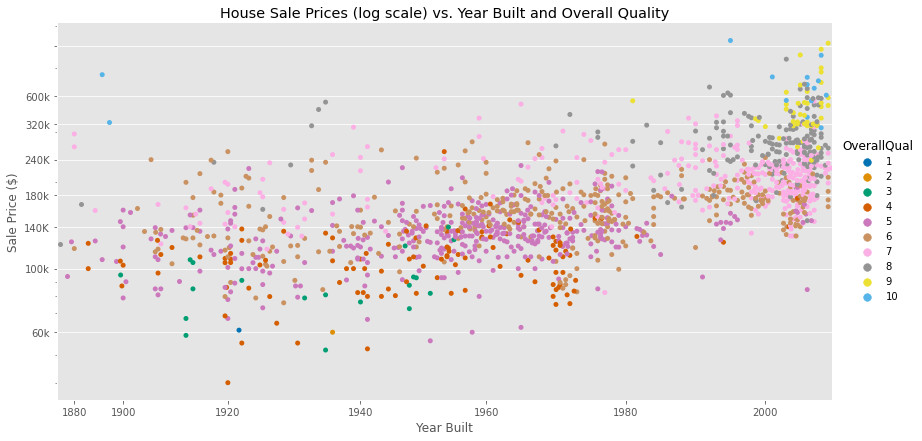

In [25]:
#List of only the index locations for the years to be used as labels
xticks = [2, 9, 24, 43, 61, 81, 101]

plt.style.use('ggplot')
g = sns.catplot(
    x = 'YearBuilt',
    y = 'SalePrice',
    data = train,
    kind='swarm',
    hue='OverallQual',
    palette = 'colorblind', height=6, aspect=2)

plt.title('House Sale Prices (log scale) vs. Year Built and Overall Quality')
plt.xticks(xticks, ['1880', '1900', '1920', '1940', '1960', '1980', '2000'])
plt.xlabel('Year Built')
plt.yscale('log')
plt.yticks([6e4, 1e5, 1.4e5, 1.8e5, 2.4e5, 3.2e5, 4e5, 6e5], ['60k', '100k', '140K', '180k', '240K', '320k', '600k'])
plt.ylabel('Sale Price ($)')
plt.show()